<a href="https://colab.research.google.com/github/Siddharth-joshi1/ES335_Prerequisite_22110109/blob/main/ML_Pre_requisite_test_Joshi_Siddharth_22110109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1

How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


A1

Every element of row of the matrix(n,k) will be multiplied with corresponding element of the column of matrix(k,m).this results in k multiplication for one element in the final matrix. Now ith row of the first matrix and jth column of the second matrix will result in the (i,j) element of the final matrix. Now in the final matrix there will be total n X m elements from basics of matrix mutiplication. And so to total number of multiplication is K X n X m.  

> number of multiplication: k*m*n

Similarly, for each element total k-1 addition are required and so as total n x m elements are there so total additions are as follows:


> number of additions: (k-1)*m*n









---



Q2

Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [105]:
# using lists
# Let one matrix be [[1,2,3,4],
#                    [5,6,7,8]]
# Let one matrix be [[1],
#                    [5],
#                    [2],
#                    [3]]
import time
start_time = time.time()


A=[[1,2,3,4],[5,6,7,8]]
B=[[1],[5],[2],[3]]

C = []
for _ in range(len(A)):
    C.append([0] * len(B[0]))


i=j=l=0
while i<len(A):
  while j<len(B[0]):
    sum=0
    while l<len(A[0]):
      sum=sum+A[i][l]*B[l][j]
      l=l+1
    C[i][j]=sum
    l=0
    j=j+1
  j=0
  i=i+1


print(C)

end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("total time take is:",elapsed_time)

[[29], [73]]
total time take is: 0.004647016525268555


In [106]:
# Using numpy
import time
start_time = time.time()
import numpy as np
A=np.array([[1,2,3,4],[5,6,7,8]])
B=np.array([[1],[5],[2],[3]])

C = np.zeros((A.shape[0], B.shape[1]))
C = np.dot(A, B)
print(C)
end_time = time.time()

elapsed_time = end_time - start_time
print("total time take is:",elapsed_time)

[[29]
 [73]]
total time take is: 0.002180337905883789


Generally it is being noted that the time take to run the matrix multiplication using numpy takes lesser time compared to the methad using list of lists.

This is because the numpy operations are vectorised and so they apply all operations on the entire matrix at once which helps in doing more and more parallel operations at a time. In list of list the problem is that it goes loop by loop but in numpy it uses the underlying C implementation to do the matrix multiplication.




---



Q3


Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Answer 3


If we use the give method then the time complexity will be O(n^2)
To reduce the time complexity we can use merge sort which is O(nlog(n)) and then we can travel to the middle index of the sorted array.

In [107]:
import time
start_time = time.time()
A=[1,2,5,8,4,3,10]
B=[]
largest=A[0]
for i in range(len(A)):
  largest=A[0]
  for j in range(len(A)):
    if A[j]>=largest:
      largest=A[j]
  A.remove(largest)
  B.append(largest)

print(B)
if len(B)%2==0:
  print((B[len(B)//2]+B[((len(B))//2-1)])/2)
else:
  print(B[(len(B))//2])

end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("total time take is:",elapsed_time)

[10, 8, 5, 4, 3, 2, 1]
4
total time take is: 0.0032324790954589844


In [108]:
#here first we will sort the array using mergesort and then we will find the median in that.
import time
import numpy

start_time = time.time()
def mergeSort(arr):
  if len(arr) > 1:
        mid = len(arr)//2

        L = arr[:mid]


        R = arr[mid:]


        mergeSort(L)

        mergeSort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] >= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1


A=[1,2,5,8,4,3,10]
mergeSort(A)
print(A)
if len(A)%2==0:
  print((A[len(A)//2]+A[((len(A))//2-1)])/2)
else:
  print(A[(len(A))//2])

end_time = time.time()

elapsed_time = end_time - start_time
print("total time take is:",elapsed_time)


[10, 8, 5, 4, 3, 2, 1]
4
total time take is: 0.0021703243255615234


In [109]:
#here we will use the numpy's median.
import time
start_time = time.time()
import numpy as np

A=[1,2,5,8,4,3,10]
median=np.median(A)
print(median)
end_time = time.time()

elapsed_time = end_time - start_time
print("total time take is:",elapsed_time)

4.0
total time take is: 0.0018291473388671875


As can be seen numpy is the faster than the general method. But it is comparitive to that using the merge sort and then finding the median. This is because the numpy uses the quick sort which is of O(n^2). While the merge sort is O(nlog(n)).



---



Q4

What is the gradient of the following function with respect to x and y?
x^2y+y^3*sinx

A4

$\vec{\nabla}f = (2xy - y^3\cos(x), x^2 + 3y^2\sin(x))$




---



Q5

Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [110]:
import jax
import jax.numpy as np
import numpy as numpy

def funct(x, y):
    return x**2 * y + y**3 * np.sin(x)

def analytical_gradient(x, y):
    df_dx = 2 * x * y + y**3 * np.cos(x)
    df_dy = x**2 + 3 * y**2 * np.sin(x)
    return np.array([df_dx, df_dy])

# Use JAX to compute the gradient
grad_fn = jax.grad(funct, argnums=(0, 1))

# Generate arrays for x and y using NumPy
x_vals = numpy.random.rand(5)
y_vals = numpy.random.rand(5)

# Use vmap to vectorize the gradient computation
jax_gradients = jax.vmap(grad_fn)(x_vals, y_vals)

analytical_gradients = np.array([analytical_gradient(x, y) for x, y in zip(x_vals, y_vals)])

print("JAX Gradients:", jax_gradients)
print("Analytical Gradients:", analytical_gradients)


JAX Gradients: (Array([0.03115512, 0.577928  , 0.8851999 , 0.24318151, 0.14000964],      dtype=float32), Array([0.00684648, 0.7052901 , 0.6283541 , 0.33511433, 0.83768594],      dtype=float32))
Analytical Gradients: [[0.03115512 0.00684648]
 [0.577928   0.7052901 ]
 [0.8851999  0.6283541 ]
 [0.24318151 0.33511433]
 [0.14000963 0.8376859 ]]




---



Q6

Use sympy to confirm that you obtain the same gradient analytically.

In [111]:
import sympy as sp

# Define the symbolic variables
x, y = sp.symbols('x y')


f = x**2*y + y**3*sp.sin(x)


df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Display the analytical gradient
analytical_gradient_sympy = [df_dx, df_dy]
print("Analytical gradient (SymPy):", analytical_gradient_sympy)


Analytical gradient (SymPy): [2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]




---



Q7

Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2


In [112]:
Dict = { '2022': [{'Branch 1':{'roll_number':1,'name':'N','marks':{'Maths':'100','English':70}}}, 'Branch 2'],
        '2023':['Branch1','Branch2'],'2024':['Branch1','Branch2'],'2025':['Branch1','Branch2']}
import pprint
pprint.PrettyPrinter().pprint(Dict)


#Here I have taken only the provided data and not added any thing from my side. this means that I have not added any marks or other divisions in the dictionary


{'2022': [{'Branch 1': {'marks': {'English': 70, 'Maths': '100'},
                        'name': 'N',
                        'roll_number': 1}},
          'Branch 2'],
 '2023': ['Branch1', 'Branch2'],
 '2024': ['Branch1', 'Branch2'],
 '2025': ['Branch1', 'Branch2']}




---



Q8

Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [113]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"Student(roll_number={self.roll_number}, name='{self.name}', marks={self.marks})"


class Branch:
    def __init__(self, name, students):
        self.name = name
        self.students = students

    def __repr__(self):
        return f"Branch(name='{self.name}', students={self.students})"


class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

    def __repr__(self):
        return f"Year(year={self.year}, branches={self.branches})"


# Creating instances based on the given data
student1 = Student(1, 'N', {'Maths': 100, 'English': 70})
branch1 = Branch('Branch 1', [student1])
branch2 = Branch('Branch 2', [])

year_2022 = Year('2022', [branch1, branch2])
year_2023 = Year('2023', ['Branch 1', 'Branch 2'])
year_2024 = Year('2024', ['Branch 1', 'Branch 2'])
year_2025 = Year('2025', ['Branch 1', 'Branch 2'])

# Creating the overall database as a list of year objects
database = [year_2022, year_2023, year_2024, year_2025]

# Printing the information
import pprint
pprint.PrettyPrinter().pprint(database)


[Year(year=2022, branches=[Branch(name='Branch 1', students=[Student(roll_number=1, name='N', marks={'Maths': 100, 'English': 70})]), Branch(name='Branch 2', students=[])]),
 Year(year=2023, branches=['Branch 1', 'Branch 2']),
 Year(year=2024, branches=['Branch 1', 'Branch 2']),
 Year(year=2025, branches=['Branch 1', 'Branch 2'])]




---



Q9

Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
y=x

y=x^2

y=x^3/100

y=sin(x)

y=sin(x)/x

y=log(x)

y=e^x



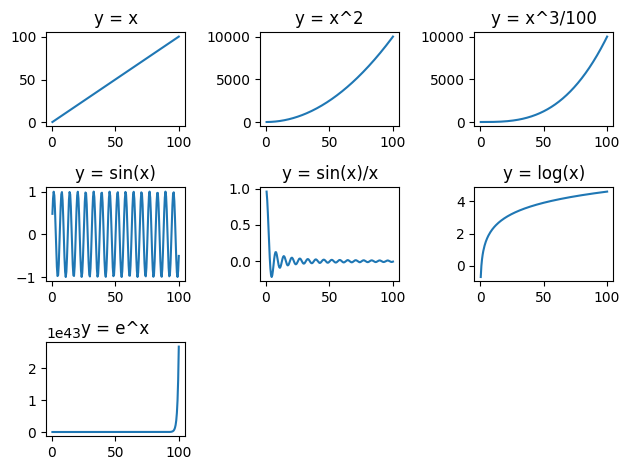

In [114]:
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(0.5, 100.5, 0.5)


y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)


plt.figure()

plt.subplot(3, 3, 1)
plt.plot(x, y1)
plt.title('y = x')

plt.subplot(3, 3, 2)
plt.plot(x, y2)
plt.title('y = x^2')

plt.subplot(3, 3, 3)
plt.plot(x, y3)
plt.title('y = x^3/100')

plt.subplot(3, 3, 4)
plt.plot(x, y4)
plt.title('y = sin(x)')

plt.subplot(3, 3, 5)
plt.plot(x, y5)
plt.title('y = sin(x)/x')

plt.subplot(3, 3, 6)
plt.plot(x, y6)
plt.title('y = log(x)')

plt.subplot(3, 3, 7)
plt.plot(x, y7)
plt.title('y = e^x')

plt.tight_layout()
plt.show()




---



Q10

Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [115]:
import numpy as np
import pandas as pd


np.random.seed(42)
matrix = np.random.uniform(1, 2, size=(20, 5))


columns = ['a', 'b', 'c', 'd', 'e']
df = pd.DataFrame(matrix, columns=columns)

max_std_column = df.std().idxmax()


min_mean_row = df.mean(axis=1).idxmin()

print("DataFrame:")
print(df)

print("\nColumn with the highest standard deviation:", max_std_column)
print("Row with the lowest mean:", min_mean_row)


DataFrame:
           a         b         c         d         e
0   1.374540  1.950714  1.731994  1.598658  1.156019
1   1.155995  1.058084  1.866176  1.601115  1.708073
2   1.020584  1.969910  1.832443  1.212339  1.181825
3   1.183405  1.304242  1.524756  1.431945  1.291229
4   1.611853  1.139494  1.292145  1.366362  1.456070
5   1.785176  1.199674  1.514234  1.592415  1.046450
6   1.607545  1.170524  1.065052  1.948886  1.965632
7   1.808397  1.304614  1.097672  1.684233  1.440152
8   1.122038  1.495177  1.034389  1.909320  1.258780
9   1.662522  1.311711  1.520068  1.546710  1.184854
10  1.969585  1.775133  1.939499  1.894827  1.597900
11  1.921874  1.088493  1.195983  1.045227  1.325330
12  1.388677  1.271349  1.828738  1.356753  1.280935
13  1.542696  1.140924  1.802197  1.074551  1.986887
14  1.772245  1.198716  1.005522  1.815461  1.706857
15  1.729007  1.771270  1.074045  1.358466  1.115869
16  1.863103  1.623298  1.330898  1.063558  1.310982
17  1.325183  1.729606  1.637557  1



---



Q11

Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [116]:
import numpy as np
import pandas as pd


np.random.seed(42)
matrix = np.random.uniform(1, 2, size=(20, 5))

columns = ['a', 'b', 'c', 'd', 'e']
df = pd.DataFrame(matrix, columns=columns)


df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

num_rows_LT8 = len(df[df['g'] == 'LT8'])

std_LT8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_GT8 = df.loc[df['g'] == 'GT8', 'f'].std()


print("DataFrame:")
print(df)


print("\nNumber of rows where the value in column 'g' is 'LT8':", num_rows_LT8)
print("Standard deviation of column 'f' for 'LT8':", std_LT8)
print("Standard deviation of column 'f' for 'GT8':", std_GT8)


DataFrame:
           a         b         c         d         e         f    g
0   1.374540  1.950714  1.731994  1.598658  1.156019  7.811925  LT8
1   1.155995  1.058084  1.866176  1.601115  1.708073  7.389442  LT8
2   1.020584  1.969910  1.832443  1.212339  1.181825  7.217101  LT8
3   1.183405  1.304242  1.524756  1.431945  1.291229  6.735577  LT8
4   1.611853  1.139494  1.292145  1.366362  1.456070  6.865923  LT8
5   1.785176  1.199674  1.514234  1.592415  1.046450  7.137949  LT8
6   1.607545  1.170524  1.065052  1.948886  1.965632  7.757638  LT8
7   1.808397  1.304614  1.097672  1.684233  1.440152  7.335069  LT8
8   1.122038  1.495177  1.034389  1.909320  1.258780  6.819704  LT8
9   1.662522  1.311711  1.520068  1.546710  1.184854  7.225866  LT8
10  1.969585  1.775133  1.939499  1.894827  1.597900  9.176944  GT8
11  1.921874  1.088493  1.195983  1.045227  1.325330  6.576907  LT8
12  1.388677  1.271349  1.828738  1.356753  1.280935  7.126452  LT8
13  1.542696  1.140924  1.802197  1.0



---



Q12

Write a small piece of code to explain broadcasting in numpy


In [117]:
import numpy as np


matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])


row_vector = np.array([10, 20, 30])


result = matrix * row_vector


print("Original Matrix:")
print(matrix)

print("\nRow Vector:")
print(row_vector)


print("\nResult after Broadcasting:")
print(result)


Original Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Row Vector:
[10 20 30]

Result after Broadcasting:
[[ 10  40  90]
 [ 40 100 180]
 [ 70 160 270]]


As can be seen that numpy is somewhat strecting the vector to the dimensions of 3*3 and then multiplying it to get the result. This is called broadcasting in numpy. This helps in several problems. Let's say youwant to subtract the mean from the matrix then you don't need to subtract it from all the rows instead it directly does this for you.



---



Q13

Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [118]:
import numpy as np
arr=[1,2,3,4,-1,6,7,8,4,3,2,2,0]

def argmin(arr1):
  index=0
  for i in range(len(arr1)):
    if arr1[i]<arr1[index]:
      index=i
  return index
print(argmin(arr))

print(np.argmin(arr))


4
4
